Glykeria Toulina 4182

In [426]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from scipy.stats import pearsonr
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats

In [427]:
data = pd.read_csv("C:Seasons_Stats.csv")
df = pd.DataFrame(data)
#df.describe()
#df.Pos.head(20)

A

In [428]:
#preprocesing of data with all conditions
#dfe is preprocesing list with all attributes
dfe=df[(df.Year>1980 ) & (df.Age>18)& (df.Age<40)& (df.MP>500) & (df.Pos.isin(['PG','SG','SF','PF','C']))]
dfe.describe()
#dfe.isnull().values.any()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,12280.000000,12280.000000,12280.000000,12280.000000,12026.000000,12280.00000,12280.000000,12280.000000,12280.000000,12280.000000,...,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000,12280.000000
mean,15220.568893,2000.322394,27.011564,64.850163,34.746300,1641.00228,14.166849,0.527453,0.163011,0.309653,...,0.743519,84.290147,203.779723,288.069870,157.727036,54.718811,34.192997,101.925326,149.772394,694.432573
std,5427.280622,10.550692,3.930087,16.278168,29.238449,752.25572,3.944164,0.046401,0.180813,0.135406,...,0.101821,67.735607,137.776679,197.368953,145.862917,36.298978,40.856924,61.798045,65.079265,456.776025
min,6085.000000,1981.000000,19.000000,14.000000,0.000000,501.00000,2.000000,0.338000,0.000000,0.024000,...,0.111000,1.000000,17.000000,23.000000,0.000000,1.000000,0.000000,5.000000,19.000000,46.000000
25%,10452.750000,1992.000000,24.000000,54.000000,7.000000,976.00000,11.500000,0.498000,0.008000,0.213000,...,0.690000,33.000000,103.000000,143.000000,57.000000,28.000000,9.000000,53.000000,98.000000,333.000000
50%,15207.500000,2001.000000,27.000000,70.000000,27.000000,1570.50000,13.800000,0.528000,0.078000,0.291000,...,0.759000,64.000000,168.000000,234.000000,111.000000,46.000000,20.000000,87.000000,144.000000,580.000000
75%,19928.250000,2010.000000,30.000000,79.000000,64.000000,2247.00000,16.400000,0.557000,0.296000,0.383000,...,0.814000,117.000000,265.000000,381.000000,208.000000,73.000000,43.000000,138.000000,196.000000,951.250000
max,24690.000000,2017.000000,39.000000,85.000000,83.000000,3533.00000,31.700000,0.762000,0.880000,1.219000,...,1.000000,558.000000,1007.000000,1530.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,3041.000000


In [429]:
#keep only important columns
players=dfe.filter(items=['Year','Player','Pos','Age','Tm','G','PTS','AST','TRB','BLK','PER','TS%'])
#players.describe()
#players.info()
players.isnull().values.any()
players=players.dropna(subset=['Year','Player','Pos','Age','Tm','G','PTS','AST','TRB','BLK','PER','TS%' ])
#players.head(20)


In [430]:
#erwtima A

#oi synolikoi pontoi ana paixti
sumPointsPp=players.groupby(['Player'], sort=False ,dropna=False)['PTS'].sum()

#kata fthinoysa seira tajinomisi
n=sumPointsPp.to_numpy()
m=-np.sort(-n)

#join with the dataframe players to have all in one
player_total_Points = pd.merge(sumPointsPp, players, on=['Player'], how='inner')


In [431]:

#gia zipf
#oi times einai tajinomimenes kata fthinousa seira kai meta prepei me zeygarakia me to index toys na ftiaxw grafiki
allpoints=m
index_allpoints=np.arange(len(m))



In [432]:
#gia isoy megethous bins
binsIs=len(allpoints)//100
equalwidth=pd.cut(allpoints,binsIs,retbins=True,right=True)
e=equalwidth[1]




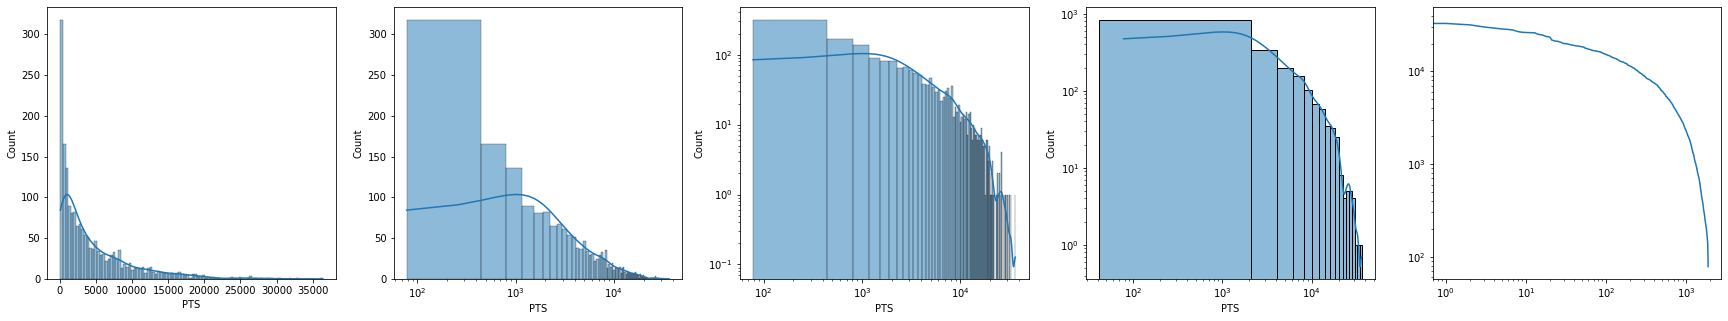

In [433]:
#erwtima A
fig, ax = plt.subplots(1, 5, figsize=(30,5))
#1
sns.histplot(sumPointsPp,bins=100,kde=True,ax=ax[0])
#2 log only in x
sns.histplot(sumPointsPp,bins=100,kde=True,ax=ax[1]).set(xscale="log")
#2 logx logy
sns.histplot(sumPointsPp,bins=100,kde=True,ax=ax[2]).set(xscale="log",yscale="log")
#3
sns.histplot(sumPointsPp, bins = e,kde=True,ax=ax[3]).set(xscale="log",yscale="log")
#4
plt.loglog(index_allpoints,allpoints)







Παρατηρώ ότι λίγοι παίχτες έχουν βάλει πάρα πολλούς πόντου, και οι περισσότεροι έχουν λίγους.

B

In [434]:

# erwtima B
#kathe paixtis se osa paixnidia kai na paije se mia sezon therwetai ws ena atomo
#gia tous pontous
playersB1=players
playersB1=players.groupby(['Age','Player'], sort=False ,dropna=False,as_index=False)[['PTS']].sum()

#sumof G for gia kathe paixti
df_sG=players.groupby(['Age','Player'], sort=False ,dropna=False,as_index=False)[['G']].sum()

def kane_mean_points(df):
    for i in df.index:
        df.at[i,"PPG"] =df.at[i,"PTS"]/df_sG.at[i,"G"]

#df_sG
kane_mean_points(playersB1)
#playersB1

#gia assist
playersB2=players
playersB2=players.groupby(['Age','Player'], sort=False ,dropna=False,as_index=False)[['AST']].sum()
def kane_mean_ast(df):
    for i in df.index:
        df.at[i,"APG"] =df.at[i,"AST"]/df_sG.at[i,"G"]

kane_mean_ast(playersB2)
playersB2

#gia rebount
playersB3=players
playersB3=players.groupby(['Age','Player'], sort=False ,dropna=False,as_index=False)[['TRB']].sum()
def kane_mean_r(df):
    for i in df.index:
        df.at[i,"RPG"] =df.at[i,"TRB"]/df_sG.at[i,"G"]

kane_mean_r(playersB3)
playersB3.head(20)

#gia block

playersB4=players
playersB4=players.groupby(['Age','Player'], sort=False ,dropna=False,as_index=False)[['BLK']].sum()
def kane_mean_b(df):
    for i in df.index:
        df.at[i,"BPG"] =df.at[i,"BLK"]/df_sG.at[i,"G"]

kane_mean_b(playersB4)
#playersB4.head(20)

C:\Users\Glykeria Toulina\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Glykeria Toulina\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Glykeria Toulina\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other 

<AxesSubplot:xlabel='Age', ylabel='BPG'>

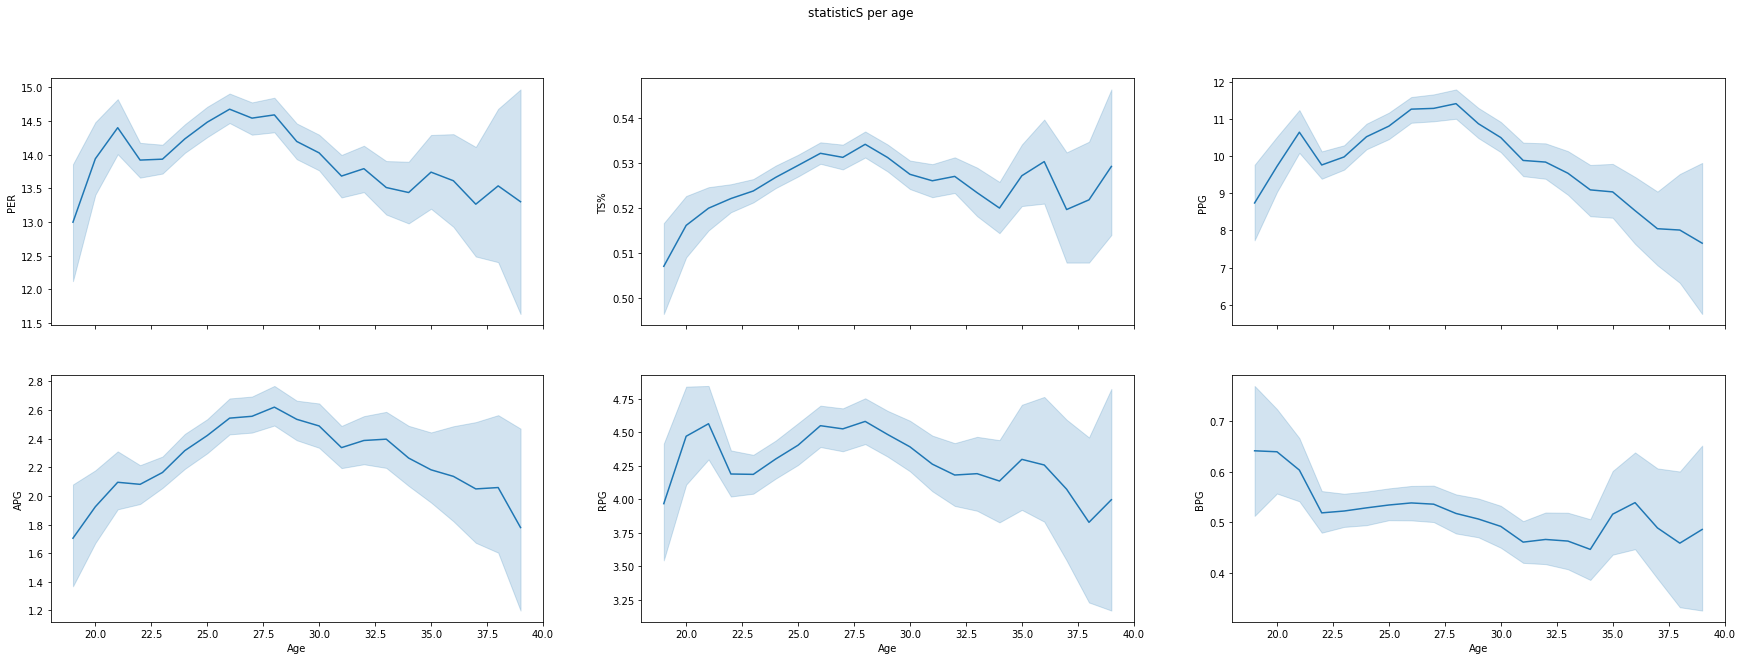

In [435]:
#Plots
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(30,10))
figure.suptitle('statisticS per age')
sns.lineplot(players.Age, players.PER,ax=axes[0][0])
sns.lineplot(players.Age, players['TS%'],ax=axes[0][1])
sns.lineplot(playersB1.Age, playersB1.PPG,ax=axes[0][2])#ppg
sns.lineplot(playersB2.Age, playersB2.APG,ax=axes[1][0])#apg
sns.lineplot(playersB3.Age, playersB3.RPG,ax=axes[1][1])#rpg
sns.lineplot(playersB4.Age, playersB4.BPG,ax=axes[1][2])#bpg oles oi ages einai idies se ola ta B..

οι τιμές που δημιουργώ για την μέση τιμή είναι για κάθε παίχτη ανεξάρτητα αν παίζει σε άλλη ομάδα.

Παρατηρούμε ότι οι παίχτες στην ηλικία από 25 περίπου εώς 30 έχουν την καλύτερη απόδοση, σχεδόν σε όλους τους τομής.(εκτός από τα μπλοκς)

C:\Users\Glykeria Toulina\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Glykeria Toulina\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Glykeria Toulina\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other 

<AxesSubplot:xlabel='Age', ylabel='BPG'>

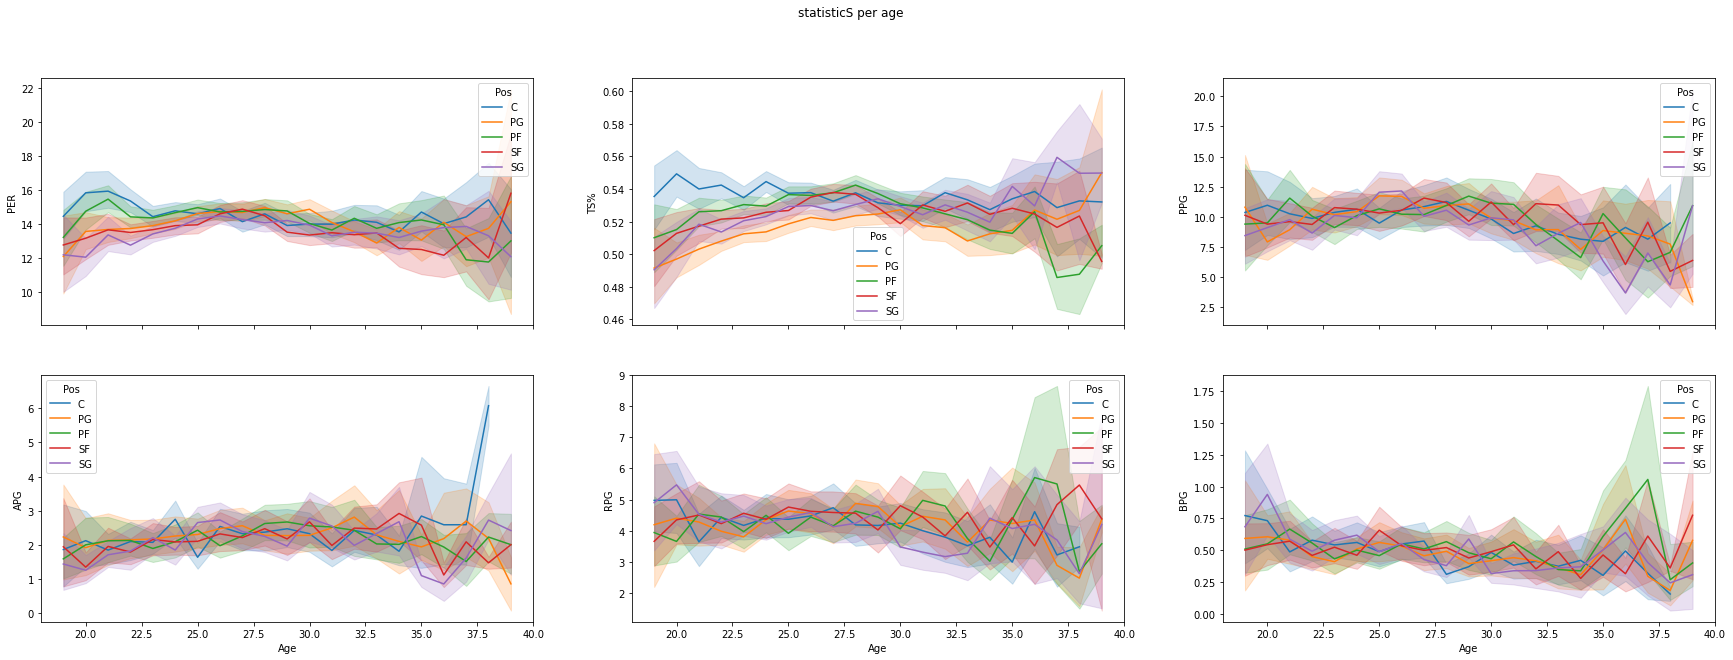

In [436]:
#Plots
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(30,10))
figure.suptitle('statisticS per age')
sns.lineplot(players.Age, players.PER, hue=players.Pos,ax=axes[0][0])
sns.lineplot(players.Age, players['TS%'], hue=players.Pos,ax=axes[0][1])
sns.lineplot(playersB1.Age, playersB1.PPG, hue=players.Pos,ax=axes[0][2])#ppg
sns.lineplot(playersB2.Age, playersB2.APG, hue=players.Pos,ax=axes[1][0])#apg
sns.lineplot(playersB3.Age, playersB3.RPG, hue=players.Pos,ax=axes[1][1])#rpg
sns.lineplot(playersB4.Age, playersB4.BPG, hue=players.Pos,ax=axes[1][2])#bpg oles oi ages einai idies se ola ta B..

Οι διαφορετικές θέσεις των παιχτών επηρεάζουν,άν και όχι με μεγάλη απόκληση την επίδοση τους.Για παράδειγμα οι PF από 35 εώς 38 παρουσιάζουν μεγάλη αύξηση των μπλοκς,όπως και στα ριμπαουντ.

Γ

In [437]:
#erwtima C
#tha upologisw ta statistika gia enan paixti oles tis seazon ara gia olh thn kargiera toy ;ara xwris na lambanw ws kleidi thn kathe xronia

playersC1=players
playersC1=players.groupby(['Player'], sort=False ,dropna=False,as_index=False)[['PTS']].sum()

#sumof G for each player
df_sG=players.groupby(['Player'], sort=False ,dropna=False,as_index=False)[['G']].sum()

def kane_mean_points(df):
    for i in df.index:
        df.at[i,"PPG"] =df.at[i,"PTS"]/df_sG.at[i,"G"]

#df_sG
kane_mean_points(playersC1)
playersC1

#gia assist
playersC2=players
playersC2=players.groupby(['Player'], sort=False ,dropna=False,as_index=False)[['AST']].sum()
def kane_mean_ast(df):
    for i in df.index:
        df.at[i,"APG"] =df.at[i,"AST"]/df_sG.at[i,"G"]

kane_mean_ast(playersC2)
playersC2

#gia rebount
playersC3=players
playersC3=players.groupby(['Player'], sort=False ,dropna=False,as_index=False)[['TRB']].sum()
def kane_mean_r(df):
    for i in df.index:
        df.at[i,"RPG"] =df.at[i,"TRB"]/df_sG.at[i,"G"]

kane_mean_r(playersC3)
playersC3.head(20)

#gia block

playersC4=players
playersC4=players.groupby(['Player'], sort=False ,dropna=False,as_index=False)[['BLK']].sum()
def kane_mean_b(df):
    for i in df.index:
        df.at[i,"BPG"] =df.at[i,"BLK"]/df_sG.at[i,"G"]

kane_mean_b(playersC4)
#playersC1
 



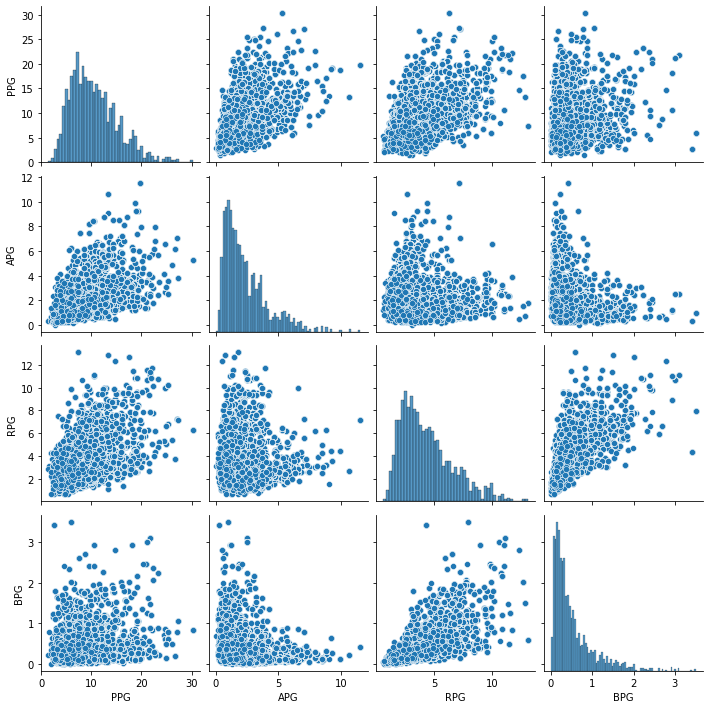

In [438]:
#gia na parw ola ta zeygarakia tha kanw join ola osa exw brei
df1= pd.merge(players, playersC1, on='Player', how='inner')#syn to PPC
df2 = pd.merge(df1, playersC2, on='Player', how='inner')#sun to AST
df3=pd.merge(df2, playersC3, on='Player', how='inner')
df_C=pd.merge(df3, playersC4, on='Player', how='inner')

#gia na doyme tis susxetiseis metaji twn timwn pou brikame
sns.pairplot(df_C,vars=['PPG','APG','RPG','BPG'])

Παρατηρώ κάποιες πιο 'γραμμικές' σχέσεις δηλαδή πεδία τα οποία μπορεί να συσχετίζονται, για παράδειγμα τα μπλοκς με τα ριμπαουντ,τις ασσιστ με τους πόντους 

          PPG       APG       RPG       BPG
PPG  1.000000  0.463835  0.394121  0.144399
APG  0.463835  1.000000 -0.173321 -0.284496
RPG  0.394121 -0.173321  1.000000  0.699858
BPG  0.144399 -0.284496  0.699858  1.000000


<AxesSubplot:>

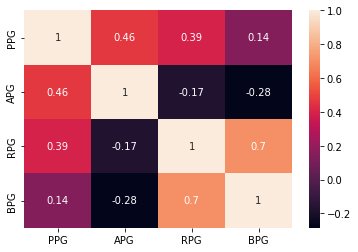

In [439]:
#gia na doyme kalytera tis sysxetiseis 
df_C1=df_C[['PPG','APG','RPG','BPG']]
print(df_C1.corr())
sns.heatmap(df_C1.corr(),annot=True)


In [440]:

#p-value

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]
def p_value(df):
    pValue = df.corr(method=pearsonr_pval)
    return pValue
    
    
p_value(df_C1)
#stats.pearsonr(df_C1.PPG,df_C1.BPG)

,PPG,APG,RPG,BPG
PPG,1.000000e+00,0.000000e+00,0.000000e+00,3.286680e-58
APG,0.000000e+00,1.000000e+00,1.987355e-83,2.380783e-227
RPG,0.000000e+00,1.987355e-83,1.000000e+00,0.000000e+00
BPG,3.286680e-58,2.380783e-227,0.000000e+00,1.000000e+00


Μία συσχέτιση που μoυ φαίνεται ενδιαφέρον είναι τα ριμπαουντ και τα μπλοκς των παιχτών ,και ίσως οι πόντοι με τις ασσιστ.Διότι έχουνε σχετικά μεγάλη τιμή correlation και μικρό p-value.

Δ

<AxesSubplot:xlabel='Pos', ylabel='BPG'>

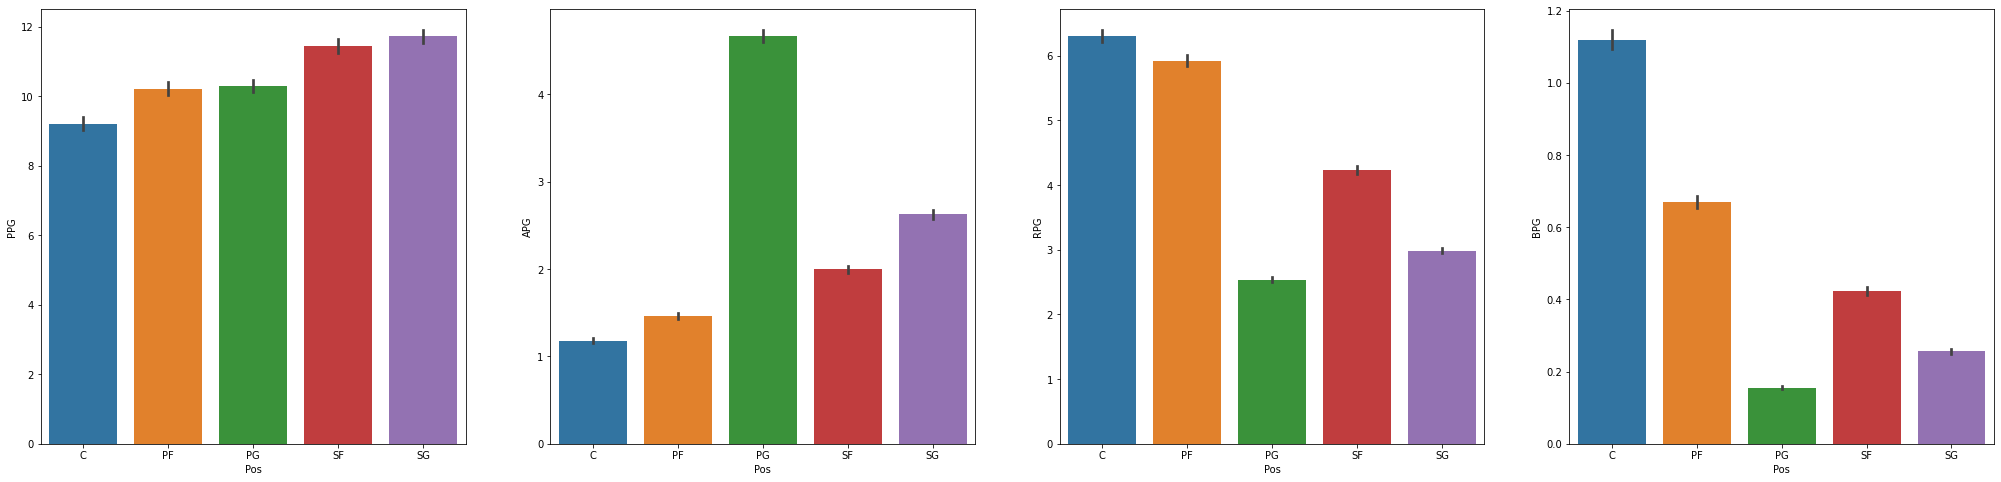

In [441]:
# erwtima D

fig, axes = plt.subplots(1, 4, sharex=True, figsize=(35,8))
sns.barplot(x="Pos", y="PPG", data=df_C,ci=95,ax=axes[0])
sns.barplot(x="Pos", y="APG", data=df_C,ci=95,ax=axes[1])
sns.barplot(x="Pos", y="RPG", data=df_C,ci=95,ax=axes[2])
sns.barplot(x="Pos", y="BPG", data=df_C,ci=95,ax=axes[3])

Παρατηρούμε ότι στις θέσεις 3,2 οι παίχτες βάζουν περισσότερους πόντους αλλά όχι με μεγάλη απόκλιση από τους άλλους.
Τις περισσότερες ασσιστ στο παιχνιδι της δίνει ο άσσος με μεγάλη απόκλιση από τους υπόλοιπους παίχτες.
Τέλος παρατηρώ ότι τα ριμπαντ και τα μπλοκ συνήθως έχουν 4,5.

<AxesSubplot:xlabel='Pos', ylabel='mPER'>

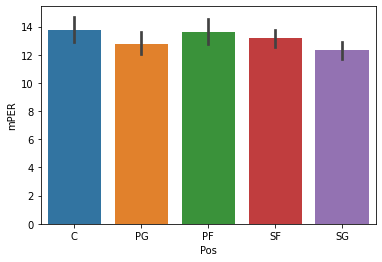

In [442]:
# erwtima D gia mean PER
#epiedh tha prepei na xrisimopoihsw ta apotelesmata tou G dld gia kathe paixti xwris na me noiazei se ti thesh einai ayto poy kanw einai oti thewrw oti gia kathe paixti metraw mono thn prwti 
#thesh poy exei emfanistei na paizei
meanPER=players
meanPER=players.groupby(['Player'], sort=False ,dropna=False,as_index=False)[['PER']].sum()

#COUNT PER for each player
df_PER=players.groupby(['Player'], sort=False ,dropna=False,as_index=False)[['PER']].count()

def kane_mean_per(df):
    for i in df.index:
        df.at[i,"mPER"] =df.at[i,"PER"]/df_PER.at[i,"PER"]

kane_mean_per(meanPER)
for_pos=pd.merge(df_C, meanPER, on='Player', how='inner')
#sbhnw oles tis diples theseis toy kathe paixti ki t0n metraw mia fora me thn prwth thesh poy emfanizetai
for_pos=for_pos.drop_duplicates(subset=['Player'])

sns.barplot(x=for_pos.Pos, y=meanPER.mPER,ci=95)


Από το παραπάνω διάγραμμα παρατηρώ ότι η γενική απόδοση των παιχτών κάθε θέσης είναι σχετικά ίδια.(όλοι οι παίχτες κάθε θέσης είναι χρήσιμοι για τον δικό τους λόγο ο καθένας).Δεν υπάρχουν μεγάλες διαφορές.


Επειδή θα χρησιμοποιήσω data από το 3ο ερώτημα και εκεί δεν έχω διακρίνει τους πόντους με βάση την θέση του παίχτη.Σε κάθε παίχτη θα υποθέσω ότι παίζει μόνο στην θέση όπου εμφανίζεται για πρώτη φορά στο dataset.Μία πιο σωστή λύση θα ήταν να θεωρήσω κάθε παίχτη που έχει παίξει σε διαφορετικές θέσεις ώς διαφορετικό άτομο.

In [443]:
#t-test gia kathe diada
def compare(arr_1, arr_2):
    alpha=0.05
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')


In [449]:

#oi pontoi ana thesi xwrismenoi wste na sugkrinw me to meanPER
m=df_C.groupby(['Player','Pos'], sort=False ,dropna=False,as_index=False)['PPG'].sum()
m1=meanPER[m.Pos=='C'].sum()
m2=meanPER[m.Pos=='PG'].sum()
m3=meanPER[m.Pos=='SF'].sum()
m4=meanPER[m.Pos=='PF'].sum()
m5=meanPER[m.Pos=='PG'].sum()


C:\Users\GLYKER~1\AppData\Local\Temp/ipykernel_37304/2569657691.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m1=meanPER[m.Pos=='C'].sum()
C:\Users\GLYKER~1\AppData\Local\Temp/ipykernel_37304/2569657691.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m2=meanPER[m.Pos=='PG'].sum()
C:\Users\GLYKER~1\AppData\Local\Temp/ipykernel_37304/2569657691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m3=meanPER[m.Pos=='SF'].sum()
C:\Users\GLYKER~1\AppData\Local\Temp/ipykernel_37304/2569657691.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m4=meanPER[m.Pos=='PF'].sum()
C:\Users\GLYKER~1\AppData\Local\Temp/ipykernel_37304/2569657691.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m5=meanPER[m.Pos=='PG'].sum()


In [450]:

meanPER["PPG"]=playersC1.PPG
meanPER["APG"]=playersC2.APG
meanPER["RPG"]=playersC3.RPG
meanPER["BPG"]=playersC4.BPG
meanPER

dd=df_C[df_C.Pos.isin(['C'])]
print(stats.ttest_ind(meanPER.mPER,dd.PPG, equal_var = False))
print(stats.ttest_ind(meanPER.mPER,meanPER.RPG,equal_var = False))
#compare()

#print(stats.ttest_ind(meanPER.mPER,meanPER.APG, equal_var = False))
#print(stats.ttest_ind(meanPER.mPER,meanPER.RPG,equal_var = False))
#print(stats.ttest_ind(meanPER.mPER,meanPER.BPG, equal_var = False))



Ttest_indResult(statistic=30.526772561160804, pvalue=9.41094195264247e-185)
Ttest_indResult(statistic=102.08928764104871, pvalue=0.0)


Ζ


In [446]:
#Z
#################sto groubpy xwris os suntikh to year
backcourt=players[players.Pos.isin(['PG','SG'])]

frontcourt=players[players.Pos.isin(['SF','PF','C'])]

#gia kathe omada se ena paixnidi koitaw to athroisma twn assist twn periferiakwn
df_sumAssist=backcourt.groupby(['Tm'], sort=True ,dropna=False)['AST'].sum()


#gia kathe omada se ena paixnidi koitaw to athroisma twn pontwn tvnm jilwn
df_sumPoints=frontcourt.groupby(['Tm'], sort=True ,dropna=False)['PTS'].sum()
df_sumPoints



teliko=pd.merge(df_sumPoints,df_sumAssist,on=['Tm'],how='inner')

teliko

#pearson CC
print(teliko.corr())
r=pearsonr(teliko.PTS,teliko.AST)
r


          PTS       AST
PTS  1.000000  0.984994
AST  0.984994  1.000000


(0.9849935150448276, 2.2573997025672643e-31)

Το corr είναι κοντά στο 1 και η p value πολύ μικρή, αυτό συνεπάγεται ότι οι αsσιστ των περιφεριακών συσχετίζονται με τους πόντους των ψηλών.

Η

In [1]:
# erwtima Η 
# #dikh moy ypothesh
# estw oi pontoi tvn jilwn sysxetizontai apo ta rebount poy tha exoyn se enan agwna gia mia omada

backcourt1=players[players.Pos.isin(['C','PF'])]


#gia kathe omada se ena paixnidi koitaw to athroisma twn assist twn periferiakwn
df_sumPTB=backcourt1.groupby(['Tm','Year'], sort=True ,dropna=False)['TRB'].sum()


#gia kathe omada se ena paixnidi koitaw to athroisma twn pontwn tvnm jilwn
df_sumPoints1=backcourt1.groupby(['Tm','Year'], sort=True ,dropna=False)['PTS'].sum()


teliko1=pd.merge(df_sumPoints1,df_sumPTB,on=['Tm'],how='inner')

teliko1

#pearson CC
r=pearsonr(teliko1.PTS,teliko1.TRB)
r
#teliko1.corr()


NameError: name 'players' is not defined

Υπόθεση:
Οι πόντοι των ψηλών θέσεις 4,5 συσχετίζονται με τους πόντους τους.

Παρατηρώ ότι δεν υπάρχει μεγάλη συσχέτιση,μικρό corr, με μικρό pvalue.